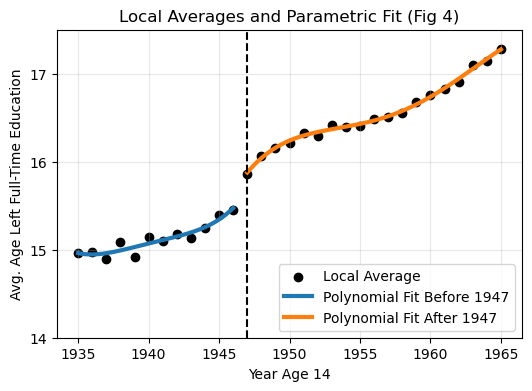

<Figure size 640x480 with 0 Axes>

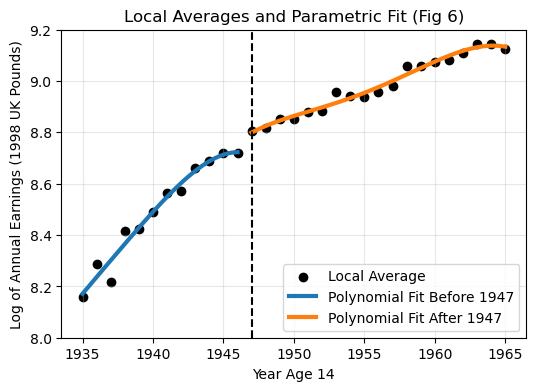

<Figure size 640x480 with 0 Axes>

In [2]:
####### Question 1 #######

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Fig 4 --- #

# Load data
df = pd.read_stata('assignment7.dta')

# Filter
df = df[(df['nireland']==0) & (df['age']>=32) & (df['age']<=64) & (df['missing_earn']==0)]

# Compute weighted average
def weighted_average(group, avg_col, weight_col):
    return (group[avg_col] * group[weight_col]).sum() / group[weight_col].sum()

avg_age = (
    df.groupby('yearat14')
    .apply(weighted_average, 'agelfted', 'wght', include_groups=False)
    .rename('avg_age')
    .reset_index())

# Fit polynomials
df_before_1947 = avg_age[avg_age['yearat14'] < 47]
df_after_1947 = avg_age[avg_age['yearat14'] >= 47]

coef_before_1947 = np.polyfit(df_before_1947['yearat14'], df_before_1947['avg_age'], 4)
poly_before_1947 = np.poly1d(coef_before_1947)

x_before_1947 = np.linspace(df_before_1947['yearat14'].min(), df_before_1947['yearat14'].max(), 200)
y_before_1947 = poly_before_1947(x_before_1947)

coef_after_1947 = np.polyfit(df_after_1947['yearat14'], df_after_1947['avg_age'], 4)
poly_after_1947 = np.poly1d(coef_after_1947)

x_after_1947 = np.linspace(df_after_1947['yearat14'].min(), df_after_1947['yearat14'].max(), 200)
y_after_1947 = poly_after_1947(x_after_1947)

# Plot
plt.figure(figsize=(6, 4))
plt.scatter(avg_age['yearat14'], avg_age['avg_age'], label='Local Average', color='k')
plt.plot(x_before_1947, y_before_1947, label='Polynomial Fit Before 1947', linewidth=3)
plt.plot(x_after_1947, y_after_1947, label='Polynomial Fit After 1947', linewidth=3)
plt.axvline(47,0,1, color='k', linestyle='--')
plt.ylim([14,17.5])
plt.xticks([x for x in range(35,66,5)],[x for x in range(1935,1966,5)])
plt.yticks([14,15,16,17])
plt.grid(alpha=0.3)
plt.ylabel('Avg. Age Left Full-Time Education')
plt.xlabel('Year Age 14')
plt.title('Local Averages and Parametric Fit (Fig 4)')
plt.legend()
plt.show()

plt.savefig('outputs/figure4.png', dpi=300, bbox_inches='tight')
# --- Fig 6 --- #

# Read data
df = pd.read_stata('assignment7.dta')

# Filter
df = df[(df['nireland']==0) & (df['age']>=32) & (df['age']<=64) & (df['missing_earn']==0)]

# Compute weighted average
def weighted_average(group, avg_col, weight_col):
    return (group[avg_col] * group[weight_col]).sum() / group[weight_col].sum()

avg_earn = (
    df.groupby('yearat14')
    .apply(weighted_average, 'learn', 'wght', include_groups=False)
    .rename('avg_earn')
    .reset_index())

# Fit polynomials
df_before_1947 = avg_earn[avg_earn['yearat14'] < 47]
df_after_1947 = avg_earn[avg_earn['yearat14'] >= 47]

coef_before_1947 = np.polyfit(df_before_1947['yearat14'], df_before_1947['avg_earn'], 4)
poly_before_1947 = np.poly1d(coef_before_1947)

x_before_1947 = np.linspace(df_before_1947['yearat14'].min(), df_before_1947['yearat14'].max(), 200)
y_before_1947 = poly_before_1947(x_before_1947)

coef_after_1947 = np.polyfit(df_after_1947['yearat14'], df_after_1947['avg_earn'], 4)
poly_after_1947 = np.poly1d(coef_after_1947)

x_after_1947 = np.linspace(df_after_1947['yearat14'].min(), df_after_1947['yearat14'].max(), 200)
y_after_1947 = poly_after_1947(x_after_1947)

# Plot
plt.figure(figsize=(6, 4))
plt.scatter(avg_earn['yearat14'], avg_earn['avg_earn'], label='Local Average', color='k')
plt.plot(x_before_1947, y_before_1947, label='Polynomial Fit Before 1947', linewidth=3)
plt.plot(x_after_1947, y_after_1947, label='Polynomial Fit After 1947', linewidth=3)
plt.axvline(47,0,1, color='k', linestyle='--')
plt.ylim([8,9.2])
plt.xticks([x for x in range(35,66,5)],[x for x in range(1935,1966,5)])
plt.yticks([8,8.2,8.4,8.6,8.8,9,9.2])
plt.grid(alpha=0.3)
plt.ylabel('Log of Annual Earnings (1998 UK Pounds)')
plt.xlabel('Year Age 14')
plt.title('Local Averages and Parametric Fit (Fig 6)')
plt.legend()
plt.show()
plt.savefig('outputs/figure6.png', dpi=300, bbox_inches='tight')


In [3]:
####### Question 2 #######

import pandas as pd
import statsmodels.formula.api as smf

# Load data
df = pd.read_stata("assignment7.dta")

# Generate clusted id
df["cluster"] = (df["yearat14"].astype(int).astype(str))

# Filter data
df = df[(df['nireland']==0) & (df['age']>=32) & (df['age']<=64) & (df['missing_earn']==0)]

# WLS definition
def run_wls(dep, rhs, needed_vars, label):
    formula = f"{dep} ~ {rhs}"
    data = df[needed_vars].dropna()
    model = smf.wls(formula, data=data, weights=data["wght"])
    res = model.fit(cov_type="cluster", cov_kwds={"groups": data["cluster"]})
    return res

cohort_terms = "yearat14 + yearat14_2 + yearat14_3 + yearat14_4"
age_poly     = "age + age2 + age3 + age4"

# --- First Stage Implementation --- #
fs1 = run_wls(dep="agelfted", rhs=f"drop15 + {cohort_terms}",
    needed_vars=["agelfted", "drop15", "yearat14", "yearat14_2",
                 "yearat14_3", "yearat14_4", "wght", "cluster"],
    label="FS (1)")

fs2 = run_wls(dep="agelfted", rhs=f"drop15 + {cohort_terms} + {age_poly}",
    needed_vars=["agelfted", "drop15", "yearat14", "yearat14_2",
                 "yearat14_3", "yearat14_4",
                 "age", "age2", "age3", "age4",
                 "wght", "cluster"],
    label="FS (2)")

fs3 = run_wls(dep="agelfted", rhs=f"drop15 + {cohort_terms} + C(age)",
    needed_vars=["agelfted", "drop15", "yearat14", "yearat14_2",
                 "yearat14_3", "yearat14_4",
                 "age", "wght", "cluster"],
    label="FS (3)")

# --- Reduced Form Implementation --- #
rf4 = run_wls(dep="learn", rhs=f"drop15 + {cohort_terms}",
    needed_vars=["learn", "drop15", "yearat14", "yearat14_2",
                 "yearat14_3", "yearat14_4", "wght", "cluster"],
    label="RF (4)")

rf5 = run_wls(dep="learn", rhs=f"drop15 + {cohort_terms} + {age_poly}",
    needed_vars=["learn", "drop15", "yearat14", "yearat14_2",
                 "yearat14_3", "yearat14_4",
                 "age", "age2", "age3", "age4",
                 "wght", "cluster"],
    label="RF (5)")

rf6 = run_wls(dep="learn", rhs=f"drop15 + {cohort_terms} + C(age)",
    needed_vars=["learn", "drop15", "yearat14", "yearat14_2",
                 "yearat14_3", "yearat14_4",
                 "age", "wght", "cluster"],
    label="RF (6)")

# At the cell level...
def cell_treat(res):
    b  = res.params["drop15"]
    se = res.bse["drop15"]
    return f"{b:.3f} [{se:.3f}]"

table1 = pd.DataFrame(index=["Great Britain", "Birth Cohort Polynomial Controls", "Age Polynomial Controls", "Age Dummies"],
                      columns=["(1)", "(2)", "(3)", "(4)", "(5)", "(6)"])
table1.loc["Great Britain", "(1)"] = cell_treat(fs1)
table1.loc["Great Britain", "(2)"] = cell_treat(fs2)
table1.loc["Great Britain", "(3)"] = cell_treat(fs3)
table1.loc["Great Britain", "(4)"] = cell_treat(rf4)
table1.loc["Great Britain", "(5)"] = cell_treat(rf5)
table1.loc["Great Britain", "(6)"] = cell_treat(rf6)
table1.loc["Birth Cohort Polynomial Controls",:] = 'Quartic'
table1.loc["Age Polynomial Controls",["(1)","(3)","(5)"]] = 'None'
table1.loc["Age Polynomial Controls",["(2)","(4)","(6)"]] = 'Quartic'
table1.loc["Age Dummies", :] = 'No'
table1.loc["Age Dummies", ["(3)", "(6)"]] = 'Yes'

print("------- TABLE 1 -------")
display(table1)

table1.to_latex('outputs/table1.tex')

------- TABLE 1 -------


,(1),(2),(3),(4),(5),(6)
Great Britain,0.495 [0.074],0.457 [0.065],0.472 [0.069],0.055 [0.015],0.052 [0.014],0.056 [0.017]
Birth Cohort Polynomial Controls,Quartic,Quartic,Quartic,Quartic,Quartic,Quartic
Age Polynomial Controls,None,Quartic,None,Quartic,None,Quartic
Age Dummies,No,No,Yes,No,No,Yes
